# Galactic Starmap Visualization
- Sandesh Pokhrel
- Santosh Pangeni
- Sanjay Bhandari
- Nikhil Aryal

## The dataset
We explored the WISE All Sky Data. It is an astronomical dataset consisting of the data of the location, size, luminosity and other several attributes of stars. 
The WISE (Wide-field Infrared Survey Explorer) All-Sky dataset is a public dataset containing infrared images of the entire sky, collected by the WISE space telescope. The WISE mission was launched in 2009 by NASA and was designed to survey the sky in the mid-infrared (3.4, 4.6, 12, and 22 micron) with higher sensitivity and resolution than previous surveys.

The All-Sky dataset contains over 1.5 million images, covering the entire sky with a resolution of up to 6 arcseconds (for the 3.4 and 4.6 micron bands) and 12 arcseconds (for the 12 and 22 micron bands). The data is stored in the Flexible Image Transport System (FITS) format, which is a standard format used for astronomical data.

The WISE All-Sky dataset has been used for a wide variety of scientific research, including the discovery of new asteroids, brown dwarfs, and distant galaxies. The data is freely available to the public through the NASA/IPAC Infrared Science Archive (IRSA) and can be accessed and downloaded by anyone with an internet connection.


## Use
- This type of datasets are used in astronomy to pinpoint location of stars and galaxy clusters for stargazing.
- The data is also used in finding the size and luminous intensity of  stars.
- Understanding the universe.

## Components
The components of Big Data we used are:
- Google Big Query API to access and extract the huge library which couldn't be done on a non-distributed or a personal computer.
- Google Big Query Web UI for querying and exploring the options on the public dataset.
- We used PySpark insted of Pandas dataframe as it is more suitable and flexible with queries for big data applications than pandas.
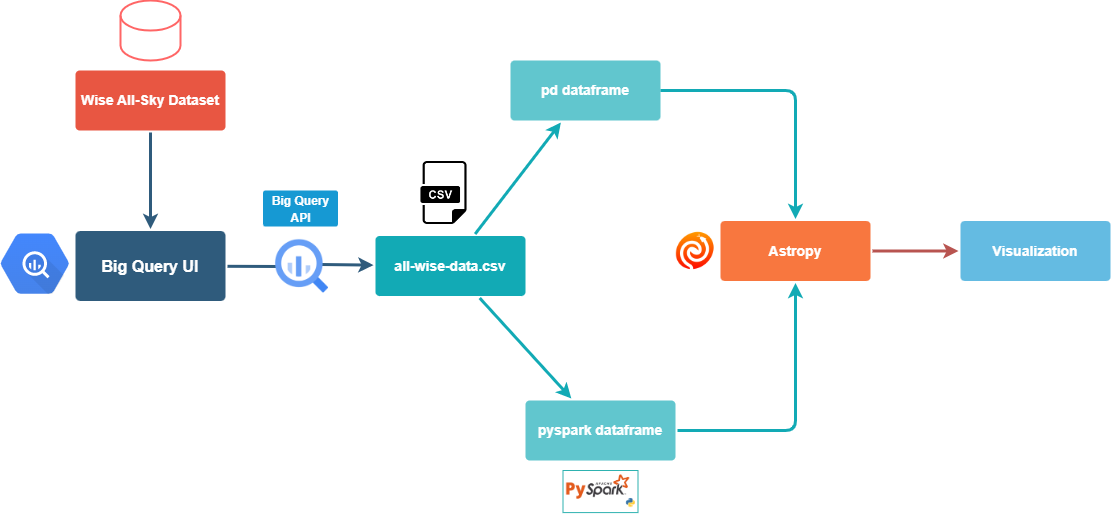

### Big Query

BigQuery is a cloud-based data warehousing and business intelligence platform developed by Google. It allows you to store, process, and analyze massive volumes of structured and semi-structured data quickly and easily.

BigQuery is designed to work with large-scale data sets and enables users to run SQL-like queries on petabytes of data within seconds. It supports a variety of data sources, including CSV, JSON, Avro, Parquet, and more, and can integrate with other Google Cloud Platform services such as Cloud Storage, Cloud Dataflow, and Cloud Dataproc.

### PySpark
PySpark is the Python API for Apache Spark, a distributed computing system designed to process large datasets in parallel across a cluster of computers. PySpark allows you to write Spark applications using Python, leveraging the power of Spark's distributed processing capabilities for big data processing tasks

In [1]:
#import essential libraries
import matplotlib
import matplotlib.pyplot as plt
import os
import json

In [2]:
#load files from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=7885fbca3d17a32ca4ae17d24adfebda1d0df391bb1f28489cd4c587a86e6de4
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
#using pyspark as our dataframe for big data
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col

## Get WISE data from Google Cloud public-datasets
The dataset is 1.3TB in size and consists of 748m star and galaxies information. We use google bigquery api and bigquery web ui to analyze the data before extracting the essential data for our purposes.

In [5]:
# from google.cloud import bigquery
# from google.oauth2 import service_account
# import json

# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient()
# secret_value = user_secrets.get_secret("google_api_cred")

# credentials = service_account.Credentials.from_service_account_info(
#     json.loads(secret_value)
# )
# client = bigquery.Client(credentials=credentials)

In [6]:
# import pandas as pd
# # from google.cloud import bigquery

# query = '''SELECT ra,dec,glon,glat FROM `bigquery-public-data.wise_all_sky_data_release.all_wise`  LIMIT 2000 '''

# # # Run the query and save the results to a DataFrame
# datafirst = client.query(query)

# ds = [(row.ra,row.dec,row.glon,row.glat) for row in datafirst]
# # print(ds)
# df = pd.DataFrame(ds,columns=['ra','dec','glon','glat'])
# df.head()
# df.to_csv('all_wise2000.csv', index = False, encoding='utf-8')

## Stars Brightest

Using Spark to read the dataset as a dataframe to plot the brightest 2000 stars in the milky way galaxy.



In [7]:
#start pyspark session and read files obtained from bigquery
spark = SparkSession.builder.appName('stars_brightest').getOrCreate()
dfspark = spark.read.csv('/content/drive/MyDrive/bigD/all_wise2000_bright.csv', header=True, inferSchema=True)

In [8]:
dfspark.head(10)

[Row(glon=343.9429933, glat=25.9094397, w1mpro=-2.335),
 Row(glon=20.8266058, glat=39.9553624, w1mpro=-2.32),
 Row(glon=296.2813343, glat=-17.5324655, w1mpro=-2.288),
 Row(glon=348.9455535, glat=-0.8143839, w1mpro=-2.284),
 Row(glon=319.4514786, glat=24.07515, w1mpro=-2.268),
 Row(glon=11.5474307, glat=16.2901576, w1mpro=-2.265),
 Row(glon=14.3390506, glat=26.1436058, w1mpro=-2.264),
 Row(glon=40.4334057, glat=-0.7932321, w1mpro=-2.259),
 Row(glon=315.1477495, glat=-0.5683395, w1mpro=-2.254),
 Row(glon=349.3103442, glat=10.7126416, w1mpro=-2.25)]

In [9]:
dfspark.show()

+-----------+-----------+------+
|       glon|       glat|w1mpro|
+-----------+-----------+------+
|343.9429933| 25.9094397|-2.335|
| 20.8266058| 39.9553624| -2.32|
|296.2813343|-17.5324655|-2.288|
|348.9455535| -0.8143839|-2.284|
|319.4514786|   24.07515|-2.268|
| 11.5474307| 16.2901576|-2.265|
| 14.3390506| 26.1436058|-2.264|
| 40.4334057| -0.7932321|-2.259|
|315.1477495| -0.5683395|-2.254|
|349.3103442| 10.7126416| -2.25|
|166.7487805| 10.3013073|-2.247|
| 14.7778653| -7.6536911|-2.239|
|165.3543904| 16.1744996|-2.233|
|134.6206909|  -2.194902|-2.232|
|139.1450032| -3.1760915|-2.229|
| 39.9283836| 44.9021138|-2.228|
| 17.5509886|  -0.126142|-2.216|
| 237.434277|-11.6122985|-2.214|
|146.6294047| 37.2317835|-2.207|
|189.5361158|    9.62912|-2.206|
+-----------+-----------+------+
only showing top 20 rows



In [10]:
# Spark Dataframe to list, convenient for plotting
mag = [row['w1mpro'] for row in dfspark.select(col('w1mpro')).collect()]
glon = [row['glon'] for row in dfspark.select(col('glon')).collect()]
glat = [row['glat'] for row in dfspark.select(col('glat')).collect()]


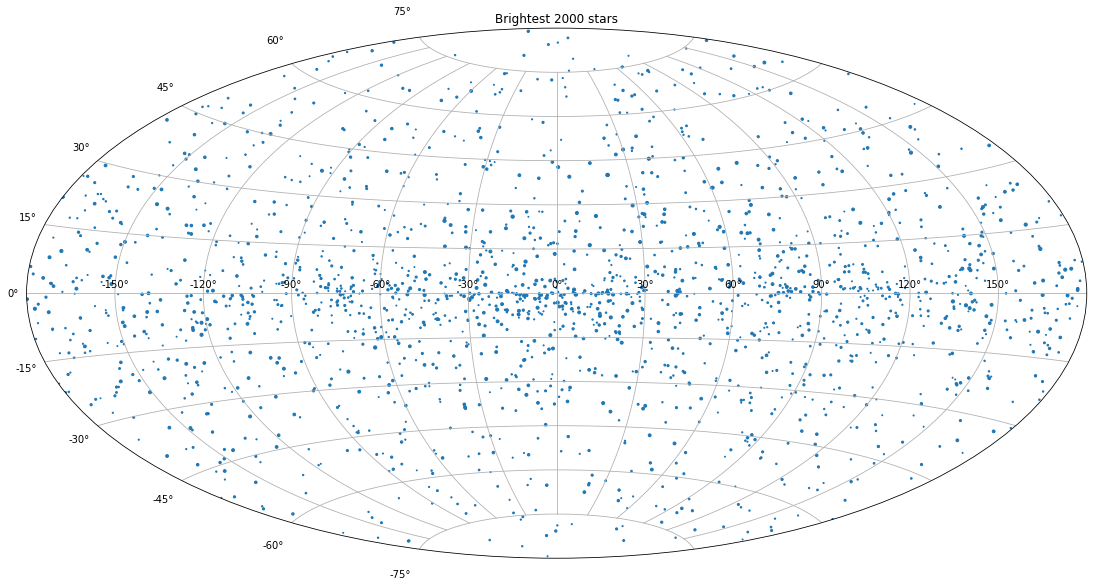

In [11]:
#using astropy library to plot the  astronomical data
import numpy as np
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

glon = np.array(glon)
glat = np.array(glat)
mag = np.array(mag)

gal = SkyCoord(glon[:2000], glat[:2000], frame='galactic', unit=u.deg)


plt.rcParams['figure.figsize'] = (19,14)
plt.subplot(111, projection='aitoff')
plt.title('Brightest 2000 stars')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=mag**2*2)
plt.show()

## Stars Random Scatter
We randomly sampled 2000 stars regardless of brightness or size.

In [12]:
spark = SparkSession.builder.appName('stars_brightest').getOrCreate()
dfspark = spark.read.csv('/content/drive/MyDrive/bigD/all_wise2000.csv', header=True, inferSchema=True)

In [13]:
dfspark.head(10)

[Row(ra=60.1461675, dec=30.7303039, glon=164.1632816, glat=-16.6142751),
 Row(ra=26.9306604, dec=49.0068802, glon=132.3460791, glat=-12.8332448),
 Row(ra=41.4110823, dec=-52.3048188, glon=270.4647668, glat=-57.0156674),
 Row(ra=29.6480521, dec=34.3435867, glon=138.3878109, glat=-26.5045613),
 Row(ra=300.6968111, dec=-34.0296961, glon=7.0772473, glat=-28.7578211),
 Row(ra=34.9840354, dec=63.805004, glon=132.5117331, glat=2.5916166),
 Row(ra=185.7552849, dec=47.6618432, glon=136.2046746, glat=68.7274937),
 Row(ra=57.8856593, dec=11.1157858, glon=177.8343928, glat=-31.9593318),
 Row(ra=178.2297765, dec=50.5351349, glon=144.4746188, glat=64.0750117),
 Row(ra=262.6368596, dec=3.087867, glon=26.2694052, glat=19.3755281)]

In [14]:
dfspark.show()

+-----------+-----------+-----------+-----------+
|         ra|        dec|       glon|       glat|
+-----------+-----------+-----------+-----------+
| 60.1461675| 30.7303039|164.1632816|-16.6142751|
| 26.9306604| 49.0068802|132.3460791|-12.8332448|
| 41.4110823|-52.3048188|270.4647668|-57.0156674|
| 29.6480521| 34.3435867|138.3878109|-26.5045613|
|300.6968111|-34.0296961|  7.0772473|-28.7578211|
| 34.9840354|  63.805004|132.5117331|  2.5916166|
|185.7552849| 47.6618432|136.2046746| 68.7274937|
| 57.8856593| 11.1157858|177.8343928|-31.9593318|
|178.2297765| 50.5351349|144.4746188| 64.0750117|
|262.6368596|   3.087867| 26.2694052| 19.3755281|
|177.0990759| -5.5651765|275.6015115| 53.9274703|
| 273.491387|-46.9466231|346.7888184|-13.5500633|
|277.8103303|-54.4170106|340.7352565|-18.9813529|
|217.6152676|-63.4057272|313.7481872| -2.6326712|
|328.8563259|-59.0014069|333.9952251|-46.1005251|
|201.7716577|-36.4076617|310.8997823| 25.9119858|
| 10.8165131|  3.0017651|118.8728701|-59.8055671|


In [15]:
# Spark Dataframe to 
glon = [row['glon'] for row in dfspark.select(col('glon')).collect()]
glat = [row['glat'] for row in dfspark.select(col('glat')).collect()]


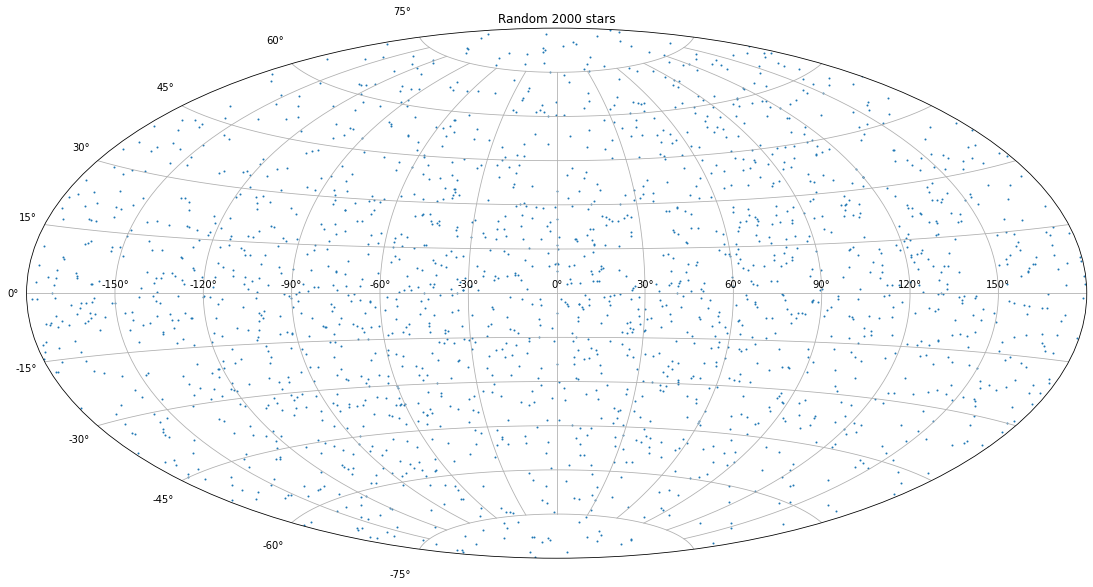

In [16]:
#plot
glon = np.array(glon)
glat = np.array(glat)

gal = SkyCoord(glon[:2000], glat[:2000], frame='galactic', unit=u.deg)

plt.rcParams['figure.figsize'] = (19,14)
plt.subplot(111, projection='aitoff')
plt.title('Random 2000 stars')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=1)
plt.show()